# The Hashing Trick 

In [9]:
# A hash function takes an input a token and outputs a hash value.
# For example, the input may be a string and the hash value may be an integer.

# Here is an example:
def simple_hash(x):
    a = 8
    return len(x)*7 % a # The prime number reduces the likelihood that the output hash code shares a common factor with the size of the array, reducing the chance of a collision.

simple_hash("test2")

3

In [10]:
# python has a hash function
hash("this is a test")

8548562293115786037

In [11]:
# We can use it to turn categorical variables into any number of feature columns:

from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=5,input_type='string')
D = [['dog'], ['cat'], ['elephant']]
f = h.transform(D)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0.]])

# Feature Selection

In [12]:
# Removing features with low variance:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [13]:
# Example for Univariate feature selection 

# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4
Reduced feature number: 2


In [14]:
# Recursive feature elimination:
from sklearn.svm import SVC
from sklearn.datasets import load_digits 

from sklearn.feature_selection import RFE

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1)) 
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1) 
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

In [15]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# Feature Importance 

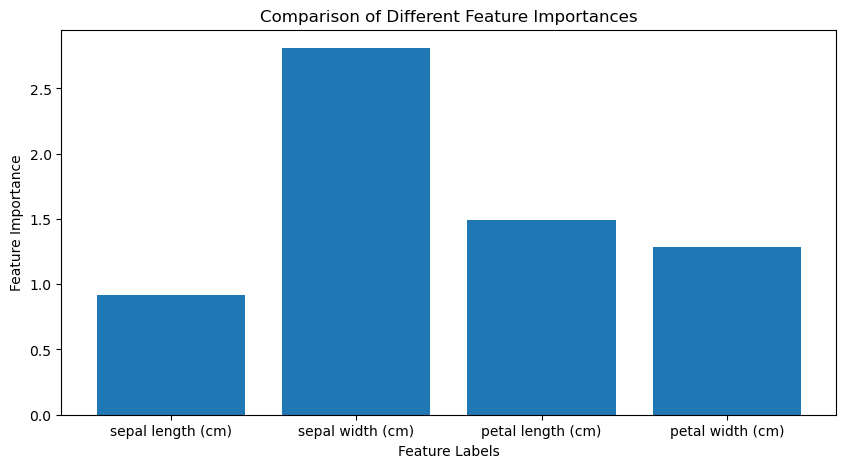

In [16]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
 
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                         criterion ='entropy', 
                                         max_features = 2,
                                         random_state=42)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importance's
feature_importance_std = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(iris_dataset.feature_names, feature_importance/feature_importance_std)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Comparison of Different Feature Importances');